In [1]:
!pip install -U lightautoml

     |████████████████████████████████| 296 kB 4.1 MB/s 
     |████████████████████████████████| 425 kB 62.9 MB/s 
     |████████████████████████████████| 308 kB 34.6 MB/s 
     |████████████████████████████████| 1.2 MB 43.5 MB/s 
     |████████████████████████████████| 215 kB 58.0 MB/s 
     |████████████████████████████████| 9.5 MB 33.1 MB/s 
     |████████████████████████████████| 804.1 MB 2.3 kB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 2.8 MB 33.0 MB/s 
     |████████████████████████████████| 210 kB 55.2 MB/s 
     |████████████████████████████████| 81 kB 7.0 MB/s 
     |████████████████████████████████| 78 kB 5.6 MB/s 
     |████████████████████████████████| 146 kB 57.8 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 113 kB 54.1 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |██████████████

In [17]:
# Standard python libraries
import logging
import os
import time
import requests
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
import torch
import seaborn as sns

# Imports from our package
# from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
# from lightautoml.tasks import Task

import pandas as pd
import requests
import io

In [6]:
df = pd.read_csv('/content/powerplant_output.csv')
df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
url = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/powerplant_output.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.shape

(9568, 5)

In [8]:
df.isnull().sum()

TemperatureCelcius         0
ExhaustVacuumHg            2
AmbientPressureMillibar    2
RelativeHumidity           4
HourlyEnergyOutputMW       0
dtype: int64

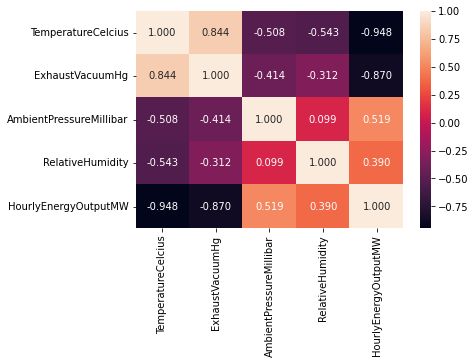

In [9]:
sns.heatmap(df.corr(), annot=True, fmt='.3f')

In [10]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 600 # Time in seconds for automl run
TARGET_NAME = 'HourlyEnergyOutputMW' # Target column name

In [11]:
X = df.drop([TARGET_NAME], axis=1)
y = df[TARGET_NAME]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

In [13]:
%%time

task = Task('reg', )

CPU times: user 2.13 ms, sys: 25 µs, total: 2.16 ms
Wall time: 2.22 ms


In [14]:
%%time

roles = {'target': TARGET_NAME}

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.58 µs


In [15]:
train_df = X_train
train_df[TARGET_NAME] = y_train
train_df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
8605,19.15,39.72,1001.49,58.62,457.45
7593,19.50,65.12,1015.53,73.87,453.99
469,23.30,48.78,1018.17,75.36,441.08
4961,7.34,40.72,1023.01,80.08,483.92
4749,22.50,58.79,1017.48,73.02,443.35


In [16]:
test_df = X_test
test_df[TARGET_NAME] = y_test
test_df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
6234,25.50,63.56,1013.85,64.69,442.28
4890,27.77,51.43,1006.58,69.01,438.70
4756,7.53,41.16,1023.19,91.28,475.70
631,8.02,41.92,1029.80,92.05,467.21
2910,8.83,43.56,1014.90,81.55,482.43


In [17]:
%%time 

automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_df, roles = roles)
logging.info('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

Выходные данные были обрезаны до нескольких последних строк (5000).
[2022-05-02 21:40:40,228] (DEBUG): 821:	learn: 3.1207814	test: 3.3478250	best: 3.3473984 (812)	total: 2.43s	remaining: 6.44s
[2022-05-02 21:40:40,234] (DEBUG): 822:	learn: 3.1194746	test: 3.3473260	best: 3.3473260 (822)	total: 2.43s	remaining: 6.44s
[2022-05-02 21:40:40,237] (DEBUG): 823:	learn: 3.1186626	test: 3.3468330	best: 3.3468330 (823)	total: 2.43s	remaining: 6.43s
[2022-05-02 21:40:40,241] (DEBUG): 824:	learn: 3.1178303	test: 3.3464826	best: 3.3464826 (824)	total: 2.44s	remaining: 6.42s
[2022-05-02 21:40:40,246] (DEBUG): 825:	learn: 3.1167815	test: 3.3458041	best: 3.3458041 (825)	total: 2.44s	remaining: 6.42s
[2022-05-02 21:40:40,249] (DEBUG): 826:	learn: 3.1160930	test: 3.3455969	best: 3.3455969 (826)	total: 2.44s	remaining: 6.41s
[2022-05-02 21:40:40,252] (DEBUG): 827:	learn: 3.1153518	test: 3.3452533	best: 3.3452533 (827)	total: 2.44s	remaining: 6.4s
[2022-05-02 21:40:40,259] (DEBUG): 828:	learn: 3.1147091	t

CPU times: user 6min 29s, sys: 39.1 s, total: 7min 8s
Wall time: 7min 40s


CPU times: user 59.1 ms, sys: 3.18 ms, total: 62.2 ms
Wall time: 68.4 ms


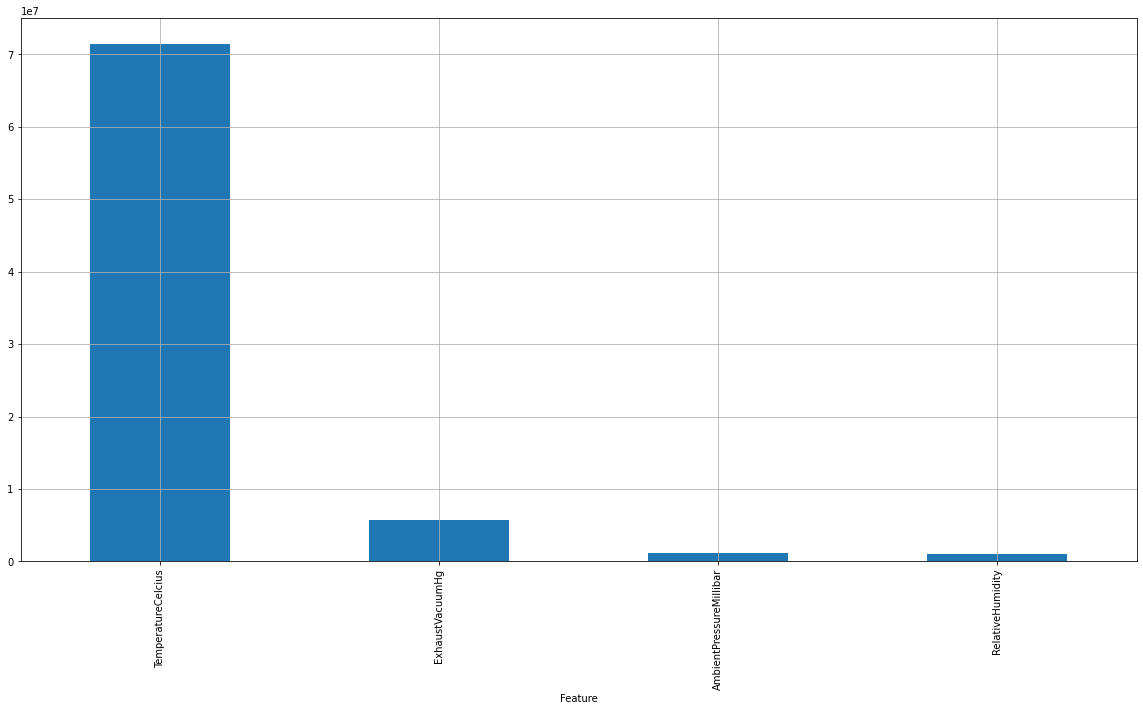

In [18]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

In [20]:
%%time

test_pred = automl.predict(test_df) # drop y

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_pred.data[:, 0])))

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))

[2022-05-02 21:54:49,219] (INFO): Check scores for test data...
[2022-05-02 21:54:49,226] (INFO): MAE score: 2.2945763439469458
[2022-05-02 21:54:49,232] (INFO): MSE score: 9.93620781902772
[2022-05-02 21:54:49,238] (INFO): MedAE score: 1.778021850585958
[2022-05-02 21:54:49,243] (INFO): R2 score: 0.9655956517384565
[2022-05-02 21:54:49,248] (INFO): Check scores for train data...
[2022-05-02 21:54:49,252] (INFO): MAE score: 2.4657324799277744
[2022-05-02 21:54:49,259] (INFO): MSE score: 11.686932614001268
[2022-05-02 21:54:49,269] (INFO): MedAE score: 1.903086547851558
[2022-05-02 21:54:49,273] (INFO): R2 score: 0.9599544404661247


CPU times: user 1.7 s, sys: 48.3 ms, total: 1.74 s
Wall time: 1.34 s


## TPOT

In [2]:
from tpot import TPOTRegressor

In [1]:
!pip install tpot 

In [4]:
# By default, accuracy is used for classification and mean squared error (MSE) is used for regression.
tpot_settings = dict(verbosity=2, random_state = 1234, warm_start = True)
TARGET_NAME = 'HourlyEnergyOutputMW'

In [5]:
train_data = pd.read_csv('/content/powerplant_output.csv')
train_data.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
train_data.isnull().sum()

TemperatureCelcius         0
ExhaustVacuumHg            2
AmbientPressureMillibar    2
RelativeHumidity           4
HourlyEnergyOutputMW       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

mean_imp = SimpleImputer(strategy="mean")

# Делаем копию данных
new_df = train_data.copy()

new_df["ExhaustVacuumHg"] = mean_imp.fit_transform(new_df[["ExhaustVacuumHg"]])
new_df["AmbientPressureMillibar"] = mean_imp.fit_transform(new_df[["AmbientPressureMillibar"]])
new_df["RelativeHumidity"] = mean_imp.fit_transform(new_df[["RelativeHumidity"]])

fig, ax =plt.subplots(1,3, figsize=(30,5))
ax[0].set_title('Impute strategy mean')
ax[1].set_title('Impute strategy mean')
ax[2].set_title('Impute strategy mean')

sns.distplot(new_df["Fuel_Type"], ax=ax[0])
sns.distplot(new_df["Present_Price"], ax=ax[1])
sns.distplot(new_df["Kms_Driven"], ax=ax[2])

In [8]:
# Делаем копию данных
new_df = train_data.copy()

X = new_df.drop([TARGET_NAME], axis=1)
y = new_df[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

new_train_df = X_train
new_train_df[TARGET_NAME] = y_train
new_train_df.head()

new_test_df = X_test
new_test_df[TARGET_NAME] = y_test
new_test_df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
6234,25.50,63.56,1013.85,64.69,442.28
4890,27.77,51.43,1006.58,69.01,438.70
4756,7.53,41.16,1023.19,91.28,475.70
631,8.02,41.92,1029.80,92.05,467.21
2910,8.83,43.56,1014.90,81.55,482.43


In [9]:
%%time
auto_reg = TPOTRegressor(generations=2, population_size=5, **tpot_settings)

CPU times: user 0 ns, sys: 59 µs, total: 59 µs
Wall time: 64.6 µs


In [10]:
auto_reg.fit(new_df.drop(TARGET_NAME,1), new_df[TARGET_NAME])

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -11.146289301937268

Generation 2 - Current best internal CV score: -11.146289301937268

Best pipeline: XGBRegressor(LinearSVR(input_matrix, C=0.01, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, tol=1e-05), learning_rate=0.5, max_depth=4, min_child_weight=9, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


TPOTRegressor(generations=2, population_size=5, random_state=1234, verbosity=2,
              warm_start=True)

In [11]:
test_predictions = auto_reg.predict(new_test_df.drop(TARGET_NAME,1))

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('R2 score: {}'.format(r2_score(new_test_df[TARGET_NAME].values, test_predictions)))

[2022-05-02 22:11:46,047] (INFO): Check scores for test data...
[2022-05-02 22:11:46,052] (INFO): MAE score: 1.92607957925667
[2022-05-02 22:11:46,058] (INFO): MSE score: 6.927030914473488
[2022-05-02 22:11:46,063] (INFO): MedAE score: 1.4582257080078023
[2022-05-02 22:11:46,068] (INFO): R2 score: 0.9760149960286012


Imputing missing values in feature set


In [12]:
train_predictions = auto_reg.predict(new_train_df.drop(TARGET_NAME,1))

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('R2 score: {}'.format(r2_score(new_train_df[TARGET_NAME].values, train_predictions)))

[2022-05-02 22:11:50,819] (INFO): Check scores for train data...
[2022-05-02 22:11:50,831] (INFO): MAE score: 1.9184773050651618
[2022-05-02 22:11:50,844] (INFO): MSE score: 6.911748975111239
[2022-05-02 22:11:50,849] (INFO): MedAE score: 1.5070141601562455
[2022-05-02 22:11:50,854] (INFO): R2 score: 0.976316723625631


Imputing missing values in feature set


In [13]:
# Get the best model
exctracted_best_model = auto_reg.fitted_pipeline_.steps[-1][1]

print(exctracted_best_model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=9,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=1234,
             reg_alpha=0, reg_lambda=1, ...)


In [14]:
# Access it's features
exctracted_best_model.feature_importances_

array([0.89212936, 0.0534521 , 0.04093501, 0.007115  , 0.00636849],
      dtype=float32)

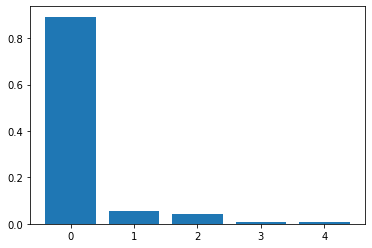

In [15]:
import matplotlib.pyplot as plt
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)
plt.show()

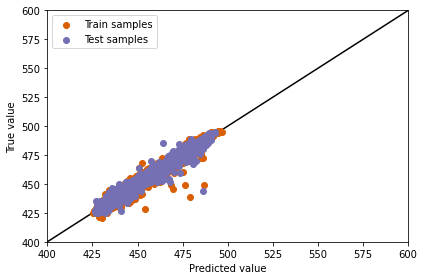

In [21]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([400, 600], [400, 600], c='k', zorder=0)
plt.xlim([400, 600])
plt.ylim([400, 600])
plt.tight_layout()
plt.show()

### Linear Regression

In [16]:
train_data = pd.read_csv('/content/powerplant_output.csv')
train_data.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
[2022-05-02 22:14:19,469] (INFO): NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functi

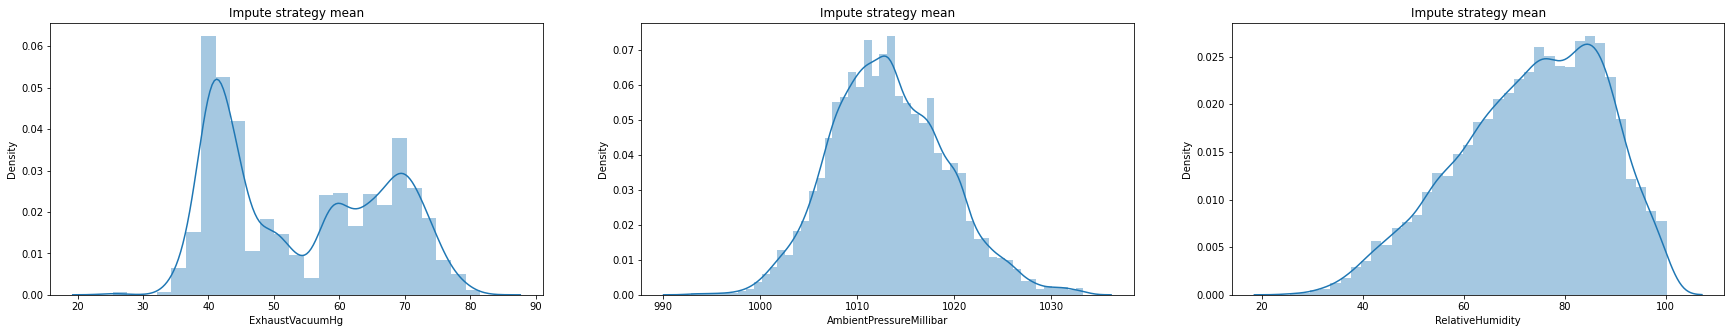

In [17]:
# Делаем копию данных
new_df = train_data.copy()

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

mean_imp = SimpleImputer(strategy="mean")

new_df["ExhaustVacuumHg"] = mean_imp.fit_transform(new_df[["ExhaustVacuumHg"]])
new_df["AmbientPressureMillibar"] = mean_imp.fit_transform(new_df[["AmbientPressureMillibar"]])
new_df["RelativeHumidity"] = mean_imp.fit_transform(new_df[["RelativeHumidity"]])

fig, ax =plt.subplots(1,3, figsize=(30,5))
ax[0].set_title('Impute strategy mean')
ax[1].set_title('Impute strategy mean')
ax[2].set_title('Impute strategy mean')

sns.distplot(new_df["ExhaustVacuumHg"], ax=ax[0])
sns.distplot(new_df["AmbientPressureMillibar"], ax=ax[1])
sns.distplot(new_df["RelativeHumidity"], ax=ax[2])

In [18]:
X = new_df.drop([TARGET_NAME], axis=1)
y = new_df[TARGET_NAME]

In [19]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X_mean = scaler.fit_transform(X)
pd.DataFrame(X_mean, columns=columns).describe()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-1.719813e-16,-6.435302e-17,-1.494569e-14,-4.761265e-16
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.394126e+00,-2.278168e+00,-3.430483e+00,-3.270786e+00
25%,-8.240958e-01,-9.890578e-01,-7.005327e-01,-6.837474e-01
50%,9.309729e-02,-1.752973e-01,-5.299047e-02,1.134105e-01
75%,8.143721e-01,9.627083e-01,6.737052e-01,7.891538e-01
max,2.342804e+00,2.144786e+00,3.375026e+00,1.839245e+00


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

new_train_df = X_train
new_train_df[TARGET_NAME] = y_train
new_train_df.head()

new_test_df = X_test
new_test_df[TARGET_NAME] = y_test
new_test_df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
6234,25.50,63.56,1013.85,64.69,442.28
4890,27.77,51.43,1006.58,69.01,438.70
4756,7.53,41.16,1023.19,91.28,475.70
631,8.02,41.92,1029.80,92.05,467.21
2910,8.83,43.56,1014.90,81.55,482.43


In [21]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [23]:
test_predictions = lin_model.predict(X_test)

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('R2 score: {}'.format(r2_score(new_test_df[TARGET_NAME].values, test_predictions)))

train_predictions = lin_model.predict(X_train)

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('R2 score: {}'.format(r2_score(new_train_df[TARGET_NAME].values, train_predictions)))

[2022-05-02 22:16:35,722] (INFO): Check scores for test data...
[2022-05-02 22:16:35,724] (INFO): MAE score: 2.577852015213237e-14
[2022-05-02 22:16:35,730] (INFO): MSE score: 1.4653392186194407e-27
[2022-05-02 22:16:35,733] (INFO): MedAE score: 0.0
[2022-05-02 22:16:35,739] (INFO): R2 score: 1.0
[2022-05-02 22:16:35,745] (INFO): Check scores for train data...
[2022-05-02 22:16:35,753] (INFO): MAE score: 2.4715821527145164e-14
[2022-05-02 22:16:35,756] (INFO): MSE score: 1.4049317955564881e-27
[2022-05-02 22:16:35,766] (INFO): MedAE score: 0.0
[2022-05-02 22:16:35,771] (INFO): R2 score: 1.0


In [ ]:
coefficents = pd.DataFrame(lin_model.coef_, X_train.columns, columns=['Coefficients'])
print(coefficents)

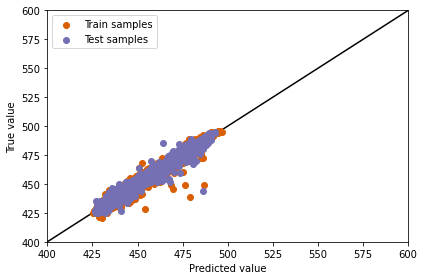

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([400, 600], [400, 600], c='k', zorder=0)
plt.xlim([400, 600])
plt.ylim([400, 600])
plt.tight_layout()
plt.show()

### Auto-sklearn

In [1]:
!pip3 install auto-sklearn

In [2]:
import autosklearn.regression

In [6]:
train_data = pd.read_csv('/content/powerplant_output.csv')
train_data.head()

TARGET_NAME = "HourlyEnergyOutputMW"

X = train_data.drop(["HourlyEnergyOutputMW"], axis=1)
y = train_data["HourlyEnergyOutputMW"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)
train_df = X_train
train_df[TARGET_NAME] = y_train
test_df = X_test
test_df[TARGET_NAME] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [7]:
train_df.head()

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
8605,19.15,39.72,1001.49,58.62,457.45
7593,19.50,65.12,1015.53,73.87,453.99
469,23.30,48.78,1018.17,75.36,441.08
4961,7.34,40.72,1023.01,80.08,483.92
4749,22.50,58.79,1017.48,73.02,443.35


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7654 entries, 8605 to 1863
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TemperatureCelcius       7654 non-null   float64
 1   ExhaustVacuumHg          7654 non-null   float64
 2   AmbientPressureMillibar  7653 non-null   float64
 3   RelativeHumidity         7651 non-null   float64
 4   HourlyEnergyOutputMW     7654 non-null   float64
dtypes: float64(5)
memory usage: 358.8 KB


In [9]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/content/autosklearn_regression_example_tmp3',
    n_jobs=5
)
# Input Column Car_Name has invalid type object. Cast it to a valid dtype before using it in Auto-Sklearn. Valid types are numerical, categorical or boolean.
# object - str ---> category
automl.fit(train_df.drop(TARGET_NAME,1), train_df[TARGET_NAME], dataset_name='powerplant_output')

AutoSklearnRegressor(n_jobs=5, per_run_time_limit=30,
                     time_left_for_this_task=120,
                     tmp_folder='/content/autosklearn_regression_example_tmp3')

In [10]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
14           1             0.54    gradient_boosting  0.037122  13.857408
8            2             0.28    gradient_boosting  0.037731  25.827067
20           3             0.10    gradient_boosting  0.041530  20.942542
3            4             0.08  k_nearest_neighbors  0.058651   4.314710


In [11]:
print(automl.show_models())

{14: {'model_id': 14, 'rank': 1, 'cost': 0.037121940459123204, 'ensemble_weight': 0.54, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f11249d60d0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f1126390e10>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f11266ba390>, 'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=5.997418027353535e-10,
                              learning_rate=0.12286466971783992, max_iter=512,
                              max_leaf_nodes=26, min_samples_leaf=8,
                              n_iter_no_change=0, random_state=1,
                              validation_fraction=None, warm_start=True)}, 8: {'model_id': 8, 'rank': 2, 'cost': 0.037730614219649405, 'ensemble_weight': 0.28, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorCh

In [12]:
test_predictions = automl.predict(test_df.drop(TARGET_NAME,1))

print('Check scores for test data...')
print('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
print('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

train_predictions = automl.predict(train_df.drop(TARGET_NAME,1))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores for test data...
MAE score: 2.214542357266386
MSE score: 9.714803743974702
MedAE score: 1.6961595916748138
R2 score: 0.9663622684440836
Check scores for train data...
MAE score: 1.3735155600295352
MSE score: 4.580165839231668
MedAE score: 0.9262244415283192
R2 score: 0.9843059500856335


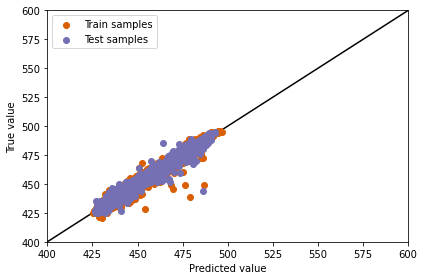

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([400, 600], [400, 600], c='k', zorder=0)
plt.xlim([400, 600])
plt.ylim([400, 600])
plt.tight_layout()
plt.show()

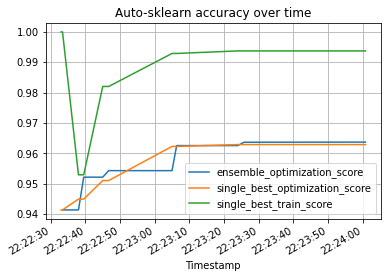

In [18]:
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)
plt.show()

In [19]:
# summarize
# At the end of the run, a summary is printed showing that 20 models were evaluated and the estimated performance of the final model was 97.1 percent.
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: powerplant_output
  Metric: r2
  Best validation score: 0.962878
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 15
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 11
  Number of target algorithms that exceeded the memory limit: 0



## H2O AutoML

In [1]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 18 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=61cfd537392a8860177019b6f96f3c9ce08dcaf62653e4955e03761fe55754a8
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [2]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy5d8wnkg
  JVM stdout: /tmp/tmpy5d8wnkg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy5d8wnkg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_5isa8g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
data = h2o.import_file('/content/powerplant_output.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
data.describe()

Rows:9568
Cols:5




,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
type,real,real,real,real,real
mins,1.81,25.36,992.89,25.56,420.26
mean,19.651231187290957,54.307404348735105,1013.2596487560104,73.3093496445002,454.36500940635455
maxs,37.11,81.56,1033.3,100.16,495.76
sigma,7.452473229611079,12.70843314662904,5.93876768815955,14.602554749897603,17.066994999803423
zeros,0,0,0,0,0
missing,0,2,2,4,0
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56


In [7]:
splits = data.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

y = TARGET_NAME

In [8]:
splits[0]

TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
14.96,41.76,1024.07,73.17,463.26
25.18,62.96,1020.04,59.08,444.37
20.86,57.32,1010.24,76.64,446.48
10.82,37.5,1009.23,96.62,473.9
26.27,59.44,1012.23,58.77,443.67
15.89,43.96,1014.02,75.24,467.35
9.48,44.71,1019.12,66.43,478.42
14.64,45,1021.78,41.25,475.98
17.99,43.72,1008.64,75.04,453.02
20.14,46.93,1014.66,64.22,453.99


In [9]:
splits[1]

TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
5.11,39.4,1012.16,92.14,488.56
11.74,43.56,1015.14,70.72,477.5
17.76,42.42,1009.09,66.26,468.27
16.38,47.45,1010.08,88.86,450.69
23.18,51.3,1012.04,78.64,448.86
12.82,38.62,1018.71,83.8,467.41
23.04,59.43,1010.23,68.99,442.99
13.76,45.87,1008.89,87.27,463.5
25.5,58.79,1016.02,64.4,440.01
26.46,74.67,1016.65,84.44,431.65


In [10]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "plants_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20220502_223848


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 5.62980671739976
RMSE: 2.372721373739395
MAE: 1.7389664743753155
RMSLE: 0.005228296520624327
Mean Residual Deviance: 5.62980671739976

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 12.083041121226284
RMSE: 3.4760669040204455
MAE: 2.5338373118364923
RMSLE: 0.007626999056743865
Mean Residual Deviance: 12.083041121226284

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.533835,0.040020,2.567857,2.515624,2.547382,2.565540,2.472773
1,mean_residual_deviance,12.083025,1.029269,13.232158,11.054349,12.054708,12.999725,11.074187
2,mse,12.083025,1.029269,13.232158,11.054349,12.054708,12.999725,11.074187
3,r2,0.958442,0.003494,0.954530,0.962566,0.958278,0.955548,0.961289
4,residual_deviance,12.083025,1.029269,13.232158,11.054349,12.054708,12.999725,11.074187
5,rmse,3.473541,0.148071,3.637603,3.324808,3.471989,3.605513,3.327790
6,rmsle,0.007622,0.000311,0.007963,0.007311,0.007595,0.007915,0.007326



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-05-02 22:39:29,3.167 sec,0.0,454.182071,453.861607,206281.353311
1,,2022-05-02 22:39:29,3.208 sec,5.0,76.614582,76.325877,5869.794194
2,,2022-05-02 22:39:29,3.245 sec,10.0,13.623105,12.907648,185.588986
3,,2022-05-02 22:39:30,3.316 sec,15.0,4.155669,3.254448,17.269586
4,,2022-05-02 22:39:30,3.397 sec,20.0,3.095130,2.319240,9.579829
5,,2022-05-02 22:39:30,3.479 sec,25.0,2.776786,2.064747,7.710540
6,,2022-05-02 22:39:30,3.572 sec,30.0,2.525255,1.856733,6.376912
7,,2022-05-02 22:39:30,3.649 sec,35.0,2.372721,1.738966,5.629807



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TemperatureCelcius,1.735025e+06,1.000000,0.829215
1,ExhaustVacuumHg,2.847079e+05,0.164094,0.136070
2,AmbientPressureMillibar,3.962086e+04,0.022836,0.018936
3,RelativeHumidity,3.301668e+04,0.019030,0.015780


A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.
Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

In [11]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_2_AutoML_1_20220502_223848,3.36983,11.3557,2.39866,0.00742515,11.3557
XGBoost_1_AutoML_1_20220502_223848,3.39399,11.5192,2.40504,0.00748089,11.5192
GBM_1_AutoML_1_20220502_223848,3.62323,13.1278,2.60605,0.00797191,13.1278
GBM_4_AutoML_1_20220502_223848,3.69476,13.6513,2.75412,0.00812171,13.6513
GBM_3_AutoML_1_20220502_223848,3.71475,13.7994,2.74786,0.00816656,13.7994
GBM_2_AutoML_1_20220502_223848,3.77102,14.2206,2.80999,0.00828942,14.2206
DRF_1_AutoML_1_20220502_223848,4.15823,17.2909,2.96626,0.00914889,17.2909
DeepLearning_1_AutoML_1_20220502_223848,4.56567,20.8453,3.44461,0.0100385,20.8453
GLM_1_AutoML_1_20220502_223848,4.58736,21.0439,3.60363,0.0100941,21.0439
XGBoost_3_AutoML_1_20220502_223848,4.69993,22.0894,3.65826,0.0103113,22.0894


In [14]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 11.355739831581165
RMSE: 3.369827863790844
MAE: 2.398658030251231
RMSLE: 0.0074251450961095354
Mean Residual Deviance: 11.355739831581165


In [15]:
train_predictions = aml.predict(train)
perf = aml.leader.model_performance(train)
perf

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 5.62980671739976
RMSE: 2.372721373739395
MAE: 1.7389664743753155
RMSLE: 0.005228296520624327
Mean Residual Deviance: 5.62980671739976


In [19]:
test_predictions = aml.predict(test)
test_predictions.head()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
485.674
474.649
462.582
454.167
448.342
468.056
444.526
464.426
442.466
432.165


In [20]:
print('Check scores for test data...')
print('MAE score: {}'.format(mean_absolute_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('MSE score: {}'.format(mean_squared_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('MedAE score: {}'.format(median_absolute_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('R2 score: {}'.format(r2_score(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('MSE score: {}'.format(mean_squared_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('MedAE score: {}'.format(median_absolute_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('R2 score: {}'.format(r2_score(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))

Check scores for test data...
MAE score: 2.398657741052394
MSE score: 11.355737861564908
MedAE score: 1.8489611816406182
R2 score: 0.961149848215417
Check scores for train data...
MAE score: 1.7389665047458112
MSE score: 5.629807288776789
MedAE score: 1.3618139648437477
R2 score: 0.9806532285764703


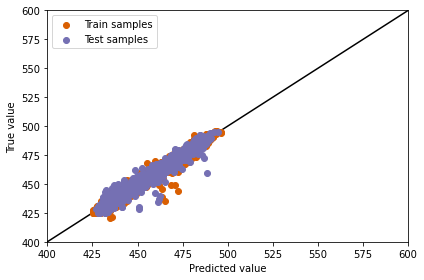

In [22]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions.as_data_frame().values, train[y].as_data_frame().values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions.as_data_frame().values, test[y].as_data_frame().values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([400, 600], [400, 600], c='k', zorder=0)
plt.xlim([400, 600])
plt.ylim([400, 600])
plt.tight_layout()
plt.show()

### Mljar

In [1]:
!pip install mljar-supervised

     |████████████████████████████████| 113 kB 4.3 MB/s 
     |████████████████████████████████| 11.3 MB 24.5 MB/s 
     |████████████████████████████████| 24.8 MB 47.2 MB/s 
     |████████████████████████████████| 2.0 MB 32.1 MB/s 
     |████████████████████████████████| 61 kB 158 kB/s 
     |████████████████████████████████| 319 kB 42.7 MB/s 
     |████████████████████████████████| 366 kB 40.7 MB/s 
     |████████████████████████████████| 86 kB 1.8 MB/s 
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.2-py3-none-any.whl size=146575 sha256=2a07f6ce97f8042bcdfb4764a5fcdf3613f9d3b25aa2db268c1e65626d472310
  Stored in directory: /root/.cache/pip/wheels/4f/67/ed/479dbde33806ee15f1611a7ff54b9db565076be8acf2ef2d29
  Created wheel for shap: filename=shap-0.36.0-cp37-cp37m-linux_x86_64.whl size=457674 sha256=3995d41a819dd604071944c196f3878e816ecb35ac02d3a53b49a6c0cbe0885d
  Stored in directory: /root/.cache/pip/wheels/6b/1e/4a/b1d65778aac48b677ac2a758251f9cccb338775e8d174

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [3]:
train_data = pd.read_csv('/content/powerplant_output.csv')
train_data.head()

TARGET_NAME = "HourlyEnergyOutputMW"

X = train_data.drop(["HourlyEnergyOutputMW"], axis=1)
y = train_data["HourlyEnergyOutputMW"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)
train_df = X_train
train_df[TARGET_NAME] = y_train
test_df = X_test
test_df[TARGET_NAME] = y_test

In [4]:
# train models with AutoML
automl = AutoML(mode="Explain")
automl.fit(train_df.drop(TARGET_NAME,1), train_df[TARGET_NAME])

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 17.016114 trained in 0.6 seconds
2_DecisionTree rmse 5.177951 trained in 15.53 seconds
3_Linear rmse 5.121508 trained in 2.35 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost rmse 3.590017 trained in 21.88 seconds
5_Default_NeuralNetwork rmse 4.18318 trained in 5.24 seconds
6_Default_RandomForest rmse 4.478435 trained in 10.18 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 3.56092 trained in 0.64 seconds
AutoML fit time: 72.8 seconds
AutoML best model: Ensemble


AutoML()

In [7]:
test_predictions = automl.predict(X_test)

print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
print('RMSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

train_predictions = automl.predict(X_train)

print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('RMSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores...
MAE score: 2.43520723832355
MSE score: 11.801006402471296
RMSE score: 3.4352592918834084
MedAE score: 1.88246203032881
R2 score: 0.9591387437237544
Check scores...
MAE score: 1.8507163819846078
MSE score: 6.804583515077353
RMSE score: 2.6085596629322767
MedAE score: 1.4064277840009822
R2 score: 0.976683928687173


In [6]:
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error, mean_absolute_error



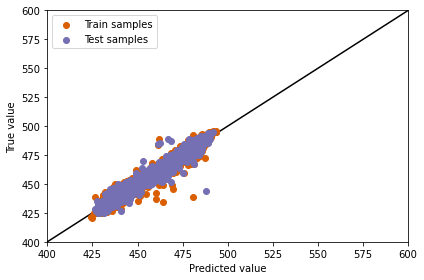

In [8]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([400, 600], [400, 600], c='k', zorder=0)
plt.xlim([400, 600])
plt.ylim([400, 600])
plt.tight_layout()
plt.show()

### Отобразим на гистограммах значение для каждой метрики для каждой исследованной системе AutoML

In [9]:
# For test dataset
import pandas as pd
 
# initialize list of lists
data = [['LAMA', 2.2945763439469458, 'MAE'], ['TPOT', 1.92607957925667, 'MAE'], ['Auto-sklearn', 2.214542357266386, 'MAE'], ['H2O', 2.398657741052394, 'MAE'], ['Mljar', 2.43520723832355, 'MAE'], ['Linear Regression', 2.577852015213237e-14, 'MAE'],
         ['LAMA', 9.93620781902772, 'MSE'], ['TPOT', 6.927030914473488, 'MSE'], ['Auto-sklearn', 9.714803743974702, 'MSE'], ['H2O', 11.355737861564908, 'MSE'], ['Mljar', 11.801006402471296, 'MSE'], ['Linear Regression', 1.4653392186194407e-27, 'MSE'],
         ['LAMA', 1.778021850585958, 'MedAE'], ['TPOT', 1.4582257080078023, 'MedAE'], ['Auto-sklearn', 1.6961595916748138, 'MedAE'], ['H2O', 1.8489611816406182, 'MedAE'], ['Mljar', 1.88246203032881, 'MedAE'], ['Linear Regression', 0.0, 'MedAE'],
         ['LAMA', 0.9655956517384565, 'R2'], ['TPOT', 0.9760149960286012, 'R2'], ['Auto-sklearn', 0.9663622684440836, 'R2'], ['H2O', 0.961149848215417, 'R2'], ['Mljar', 0.9591387437237544, 'R2'], ['Linear Regression', 1.0, 'R2']]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Metric Values', 'Metric'])
 
# print dataframe.
df

,Name,Metric Values,Metric
0,LAMA,2.294576e+00,MAE
1,TPOT,1.926080e+00,MAE
2,Auto-sklearn,2.214542e+00,MAE
3,H2O,2.398658e+00,MAE
4,Mljar,2.435207e+00,MAE
5,Linear Regression,2.577852e-14,MAE
6,LAMA,9.936208e+00,MSE
7,TPOT,6.927031e+00,MSE
8,Auto-sklearn,9.714804e+00,MSE
9,H2O,1.135574e+01,MSE


The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


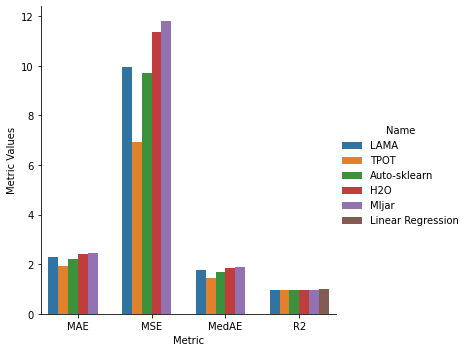

In [10]:
import seaborn as sns

sns.factorplot(x='Metric', y='Metric Values', hue='Name', data=df, kind='bar')